In [1]:
import ipywidgets as wg
from IPython.display import display

# data handling modules
import pandas as pd
import numpy as np
import datetime

# plotting imports
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='benja263', api_key='n3IdMbRThy9FG4JnFQE0')
plt.style.use('seaborn')

# web scraping
from bs4 import BeautifulSoup
import requests

# other helpers and suppress warnings
from helpers import *
from timeline_helpers import *
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

## Load Data

In [2]:
data = pd.read_csv(access_folder('generated') + 'FINAL_DF_WITH_TOPICS.csv')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (6,12,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,tweet_text,author,publish_date,following,followers,post_type,account_category,userid,tweetid,...,retweet_count,hashtags,urls,user_mentions,poll_choices,follower_count,following_count,last_tweet_at,topic,topic_scores
0,0,#FoodPoisoning is not a joke! #Walmart #KochFa...,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
1,1,#FoodPoisoning is not a joke! #Walmart #KochFa...,BARELYBARBOZA,2015-11-26 22:34:00,50,48,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
2,2,#FoodPoisoning is not a joke! #Walmart #KochFa...,D_ANDRE_AUSTIN_,2015-11-26 22:20:00,0,49,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
3,3,#FoodPoisoning is not a joke! #Walmart #KochFa...,ERTMANGRETA,2015-11-26 22:20:00,57,50,RETWEET,RightTroll,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
4,4,#FoodPoisoning is not a joke! #Walmart #KochFa...,FREDYTHECREATOR,2015-11-26 22:34:00,65,50,RETWEET,Fearmonger,d077a7eaf7286285c8c406b3d5a6449b51e5ee81d26b5a...,670002488175628293,...,15,"[FoodPoisoning, Walmart, KochFarms]",[http://www.discusscooking.com/forums/f26/very...,NaN,NaN,107,124,2015-12-15 18:06,Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...


## Users Mentioned in Tweets

In [3]:
def extract_users_mentioned(data):
    users = []
    for tweet in data.tweet_text:
        tweet = tweet.split(" ")
        for word in tweet:
            if word and word[0] == '@':
                users.append(word[1:])
    return users
users_mentioned = extract_users_mentioned(data)

In [4]:
users_mentioned = pd.Series(users_mentioned)
top_users = users_mentioned.value_counts()[:50]
top_users

midnight            2177
jstines3:           2125
thehill:            1812
mitchellvii:        1389
RNRIllinois:        1179
tedcruz              792
2AFight:             665
josephjett:          663
Shooters_Wife:       450
monaeltahawy         444
JaredWyand:          426
hannahkauthor:       382
derrickswerve:       374
peddoc63:            373
TRUCKITRICH          357
realDonaldTrump      352
Stonewall_77:        344
GiselleEvns          313
BrotherAli           308
JosephEach:          278
angelacarwile:       266
smartgirls4gop:      261
YouTube              254
SFPD                 248
HillaryClinton       242
HurriKaneSeason:     236
OfficiallyIce:       230
poetryrowan:         225
MichaelAWoodJr:      225
SaveYBI:             225
IAAS2016BAAS         220
Fingersflying:       213
THE_MAC_MOMIE        211
vistylez340          211
HoodHeatRadio:       210
WhatUpJT:            208
tedcruz45:           204
beny_benson:         201
DavidMcGuireEsq:     197
elkaryani            196


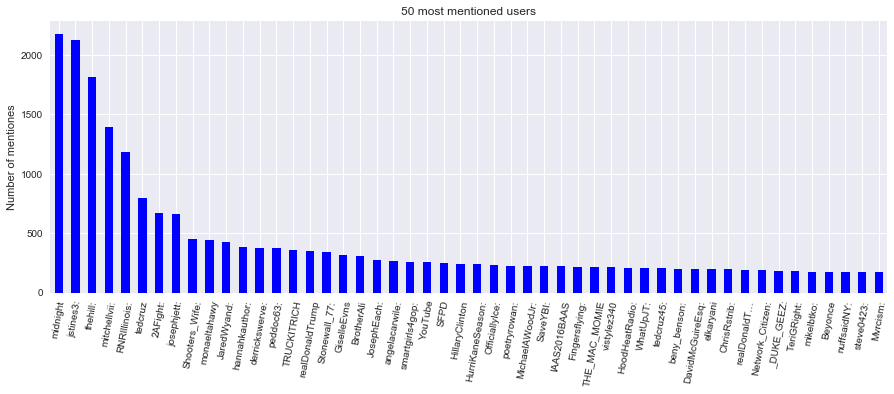

In [5]:
# Show users
fig = plt.figure(num=None, figsize=(15, 5))
top_users.plot.bar(color = 'blue')
plt.ylabel('Number of mentiones')
plt.title('50 most mentioned users')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()


In [6]:
# find if user exists in data
mentioned_authors = []
authors = set(data.author.values)
for user in users_mentioned:
    if user.upper() in authors:
        mentioned_authors.append(user.upper())

In [7]:
mentioned_authors = pd.Series(mentioned_authors)

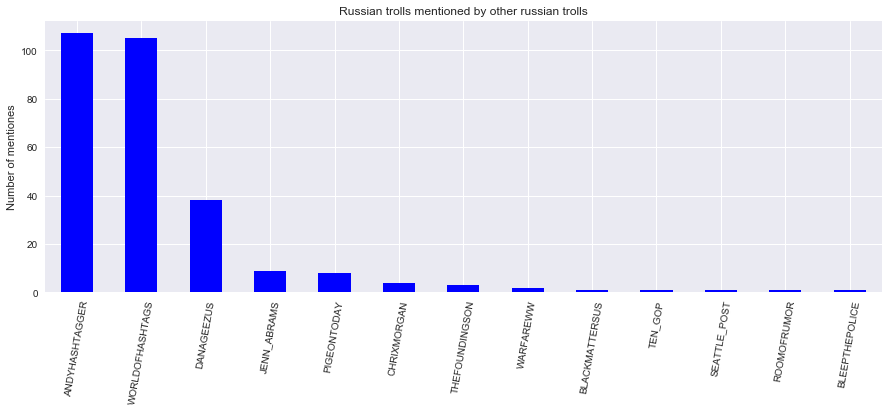

In [8]:
# Show mentioned authors
fig = plt.figure(num=None, figsize=(15, 5))
mentioned_authors.value_counts().plot.bar(color = 'blue')
plt.ylabel('Number of mentiones')
plt.title('Russian trolls mentioned by other russian trolls')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

In [21]:
andy_hashtager = data.groupby('author').get_group('ANDYHASHTAGGER')
most_retweeted = andy_hashtager.sort_values(by='retweet_count', ascending=False)
print('USER: ANDYHASHTAGER, CATEGORY: {} with {} followers'.format(andy_hashtager.account_category.values[0]
    ,andy_hashtager.followers.max()))
i = 0
print('Most Retweets')
print('')
for tweet in most_retweeted.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
print('')
print('*************')
print('Most Likes')
print('')
most_liked = andy_hashtager.sort_values(by='like_count', ascending=False)
i = 0
for tweet in most_liked.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
print('')
print('*************') 
print('Most Replies')
print('')
most_replied= andy_hashtager.sort_values(by='reply_count', ascending=False)
i = 0
for tweet in most_replied.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1

USER: ANDYHASHTAGER, CATEGORY: HashtagGamer with 23890 followers
Most Retweets

#ThingsIWontBelieve this church sign https://t.co/BY7GlfV8X0
Order your fries #MarriageAdviceIn3Words @midnight http://t.co/RuZwbcoy9a
#IShouldBeWrappingPresentsBut kids get too much presents nowadays https://t.co/dTFLZozYDk
#ItsTimeToPanicWhen Jesus is not coming back https://t.co/WB6MVbh9jG
#IHatePokemonGoBecause cops won't help me to catch them! https://t.co/9snrQKm9nW
#ToFeelBetterI try to give little girl my pneumonia #HillarysBodyDouble https://t.co/zCMbngLJaA
#WhenIWasYoung this was the best graphics ever https://t.co/6wuBQlN5it
#WhenIWasYoung it was our fault we didn’t do our homework https://t.co/WfNKee3CZi
#HowToGetMediaAttention Choose a pregnancy outfit to look like killer whale https://t.co/qpsbvBh6si
#IWasBlockedFor expressing my opinion
Tomorrow is December! I'm lovin it! #HelloDecember https://t.co/a5uR98ljtW

*************
Most Likes

#ThingsIWontBelieve this church sign https://t.co/BY7Glf

In [20]:
wordofhashtags = data.groupby('author').get_group('WORLDOFHASHTAGS')
most_retweeted = wordofhashtags.sort_values(by='retweet_count', ascending=False)
most_liked = wordofhashtags.sort_values(by='like_count', ascending=False)
most_replied = wordofhashtags.sort_values(by='reply_count', ascending=False)
i = 0
print('USER: WORLDOFHASHTAGS, CATEGORY: {} with {} followers'.format(wordofhashtags.account_category.values[0]
                                                                     ,wordofhashtags.followers.max()))
print('Most Retweets')
print('')
for tweet in most_retweeted.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
i = 0
print('')
print('*************')
print('Most Likes')
print('')
for tweet in most_liked.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
    
i = 0
print('')
print('*************')
print('Most Replies')
print('')
for tweet in most_replied.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
    

USER: WORLDOFHASHTAGS, CATEGORY: HashtagGamer with 7671 followers
Most Retweets

#ThingsIWontBelieve this church sign https://t.co/BY7GlfV8X0
Why? And when will my people learn? Whites can’t be trusted #IStartCryingWhen https://t.co/GgDfyBZ5M7
#IHatePokemonGoBecause There will be more distracted drivers
#MyOlympicSportWouldBe lightsaber badminton https://t.co/DBk08bsHLN
#ToFeelBetterI try to give little girl my pneumonia #HillarysBodyDouble https://t.co/zCMbngLJaA
#MakeMeHateYouInOnePhrase so, how do you enjoy being an adult? https://t.co/rajwIEc0KE
Our today's game via @GiselleEvns is #IHatePokemonGoBecause Tell your story and have fun! https://t.co/F2L11qpli0
#SextingWentWrongWhen you're more hungry than horny https://t.co/s1vgCJ6fC1
#HowToGetMediaAttention Choose a pregnancy outfit to look like killer whale https://t.co/qpsbvBh6si
#WhenIWasYoung I was killed.  RIP #michaelBrown #EricGarner #JamarClark #JohnCrawford #RekiaBoyd #SandraBland #blm https://t.co/5rAub0vvwI
#ThingsNotToDoA

In [19]:
danageezus = data.groupby('author').get_group('DANAGEEZUS')
most_retweeted = danageezus.sort_values(by='retweet_count', ascending=False)
most_liked = danageezus.sort_values(by='like_count', ascending=False)
most_replied = danageezus.sort_values(by='reply_count', ascending=False)
i = 0
print('USER: DANAGEEZUS, CATEGORY: {} with {} followers,'.format(danageezus.account_category.values[0],danageezus.followers.max()))
print('Most Retweets')
print('')
for tweet in most_retweeted.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
i = 0
print('')
print('*************')
print('Most Likes')
print('')
for tweet in most_liked.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
    
i = 0
print('')
print('*************')
print('Most Replies')
print('')
for tweet in most_replied.tweet_text:
    print(tweet)
    if i > 9:
        break
    i = i + 1
    

USER: DANAGEEZUS, CATEGORY: HashtagGamer with 21181 followers,
Most Retweets

Dress as your dog's favorite toy #FunThingsToDoAloneOnHalloween https://t.co/ILQGlo6wGs
#MakeMeHateYouInOnePhrase how's your diet going? https://t.co/lbSoMWBwyj
Eats pizza without using hands #MySoulmateIn5Words https://t.co/qlA4TRUumt
#TrumpSoPoor his hair left him https://t.co/27X8NHVSDS
#ItsTimeToPanicWhen Jesus is not coming back https://t.co/WB6MVbh9jG
Happy #NationalChocolateDay This is my favorite day https://t.co/M9b8KrtDJv
RIP favs https://t.co/94wVz5lOW1
#ToFeelBetterI share my pneumonia with children https://t.co/d7Yy8T7pfW
#ToFeelBetterI try to give little girl my pneumonia #HillarysBodyDouble https://t.co/zCMbngLJaA
#MillennialBillOfRights right to violate lumberjacks' rights https://t.co/NQW2RqasUb
#HowToGetMediaAttention be triggered https://t.co/8GUKAmkQp9

*************
Most Likes

Dress as your dog's favorite toy #FunThingsToDoAloneOnHalloween https://t.co/ILQGlo6wGs
#MakeMeHateYouInOnePhras

In [33]:
def series_string_to_datetime (series):
    format_str = '%Y-%m-%d %H:%M:%S' # The format
    return series.apply(lambda x: datetime.datetime.strptime(x, format_str))
data.publish_date = series_string_to_datetime(data.publish_date)
data.publish_date.head()

0        2015-11-26 22:20:00
1        2015-11-26 22:34:00
2        2015-11-26 22:20:00
3        2015-11-26 22:20:00
4        2015-11-26 22:34:00
5        2015-11-26 22:13:00
6        2015-11-26 22:34:00
7        2015-11-26 22:20:00
8        2015-11-26 22:34:00
9        2015-11-26 22:57:00
10       2015-11-26 22:57:00
11       2015-11-26 22:34:00
12       2015-11-26 22:34:00
13       2015-11-26 22:34:00
14       2015-11-26 22:34:00
15       2015-11-26 22:34:00
16       2015-11-26 22:35:00
17       2015-11-26 22:34:00
18       2015-11-26 23:31:00
19       2015-11-26 22:35:00
20       2015-11-26 23:31:00
21       2015-11-26 23:31:00
22       2015-11-26 22:34:00
23       2015-11-26 22:28:00
24       2015-11-26 22:35:00
25       2015-11-26 22:35:00
26       2015-11-26 22:34:00
27       2015-11-26 22:28:00
28       2015-11-26 22:28:00
29       2015-11-26 22:35:00
                 ...        
638016   2016-05-28 17:58:00
638017   2016-05-28 19:35:00
638018   2016-05-29 01:23:00
638019   2016-

In [54]:
spaced_df = []
d0 = data.publish_date.min()
d1 = data.publish_date.max()
dt = datetime.timedelta(days = 60)
date = d0
for i in range(len(np.arange(d0, d1, dt) + 1)):
    if i != len(np.arange(d0, d1, dt)):
        spaced_df.append(data[(data['publish_date'] >= date) &  (data['publish_date'] < date + dt)])
        date = date + dt     
    else:
        spaced_df.append(data[data['publish_date'] >= date])

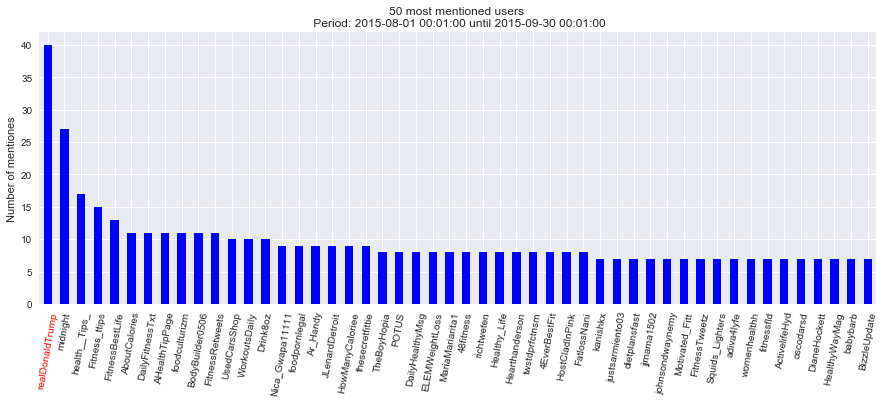

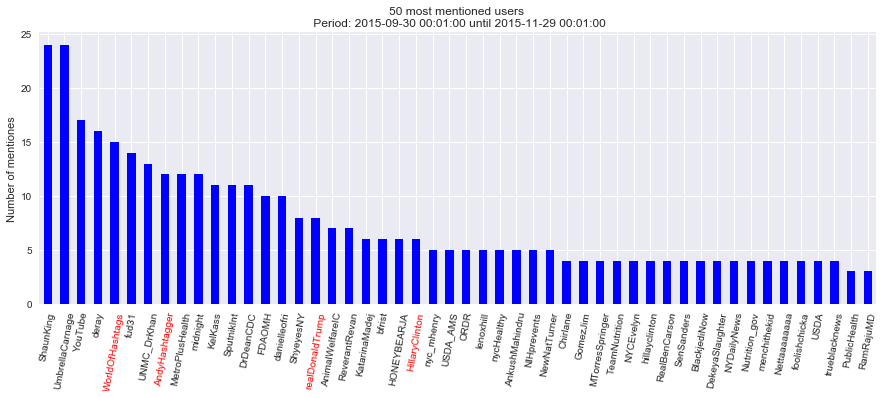

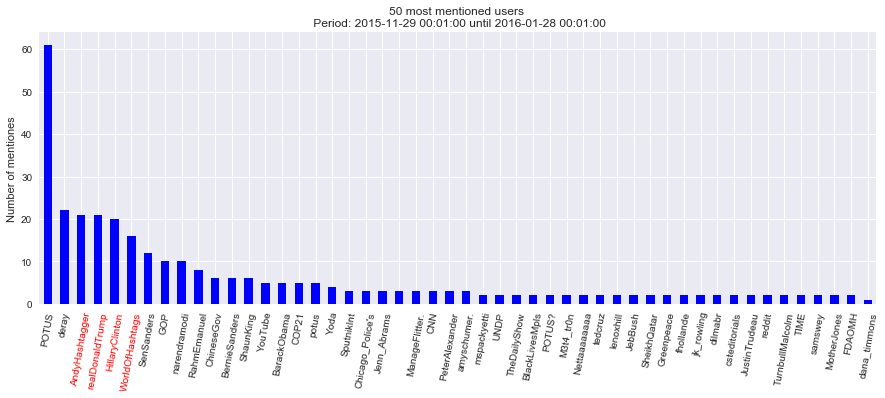

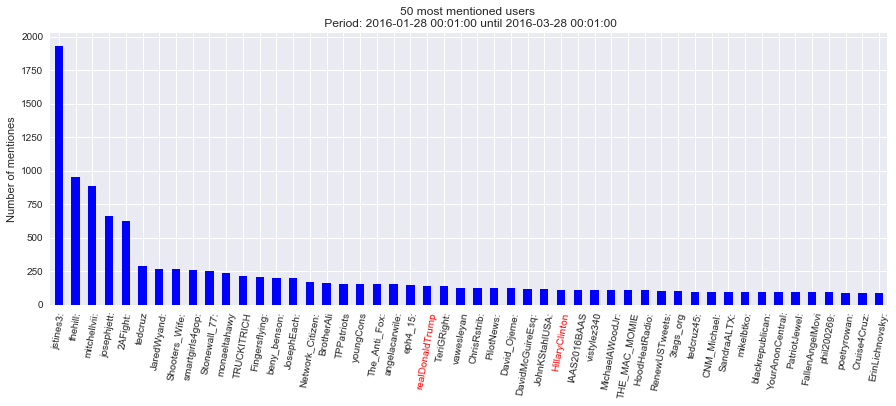

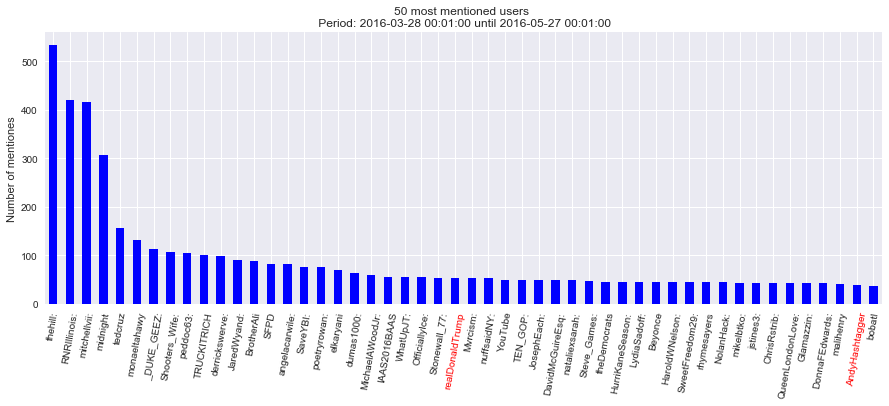

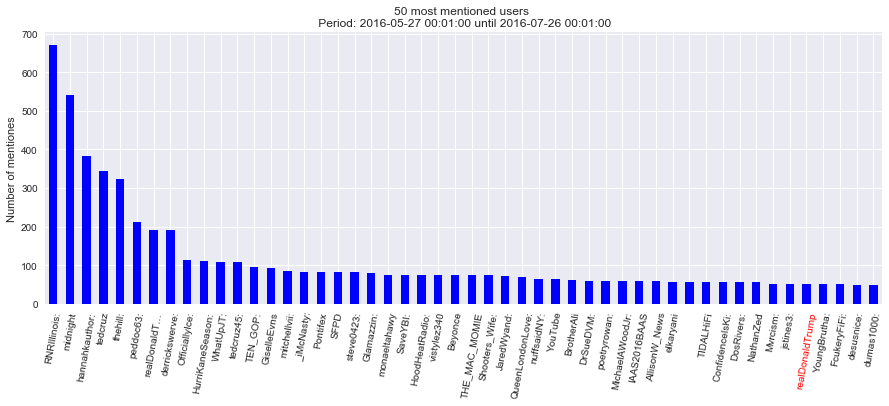

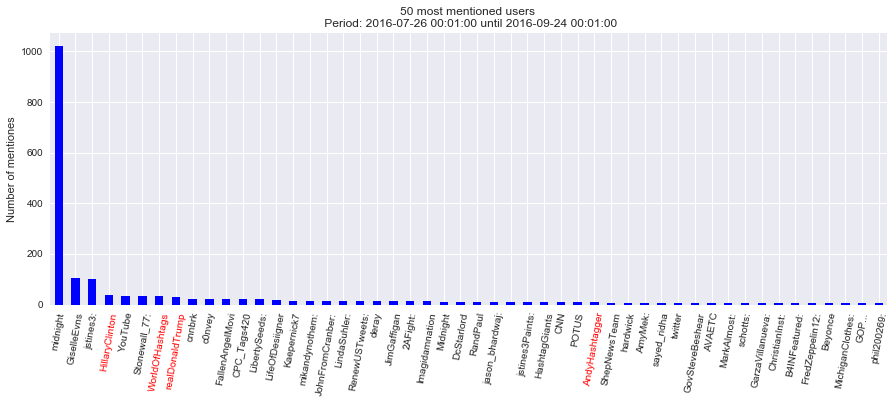

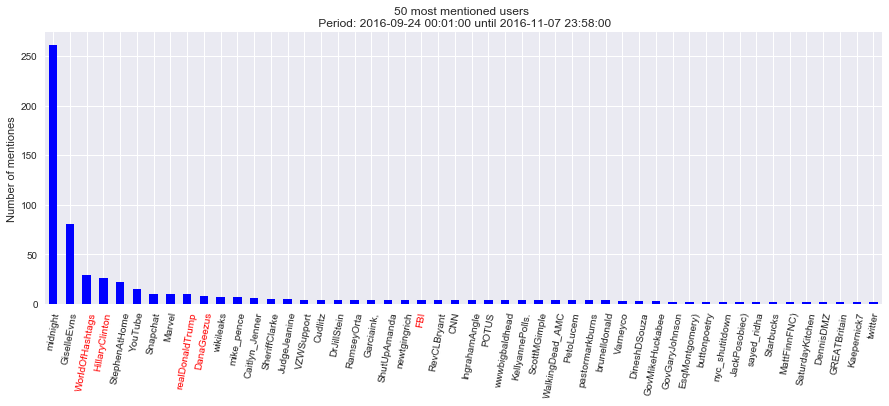

In [85]:
date = d0
i = 0
for df in spaced_df:
    users_mentioned = extract_users_mentioned(df)
    users_mentioned = pd.Series(users_mentioned)
    # Show users
    fig = plt.figure(num=None, figsize=(15, 5))
    ax = plt.gca()
    users_mentioned.value_counts()[:50].plot.bar(color = 'blue')
    plt.ylabel('Number of mentiones')
    if i != 7:
        plt.title('50 most mentioned users \n Period: {} until {}'.format(date, date + dt ))
    else:
        plt.title('50 most mentioned users \n Period: {} until {}'.format(date, d1 ))
    plt.xticks(rotation=80)
    plt.grid(True)
    
    for xtick in ax.get_xticklabels():
        if xtick.get_text() == 'realDonaldTrump' or xtick.get_text() == 'AndyHashtagger' or xtick.get_text() == 'HillaryClinton' or xtick.get_text() == 'WorldOfHashtags'  or xtick.get_text() == 'FBI' or xtick.get_text() == 'DanaGeezus':
            xtick.set_color('red')
    i = i + 1
    date = date + dt
    plt.show()

## Swing State Analysis

# Load Swing State Dictionary

In [3]:
with open('../generated/state_n_city.pickle', 'rb') as handle:
    state_n_city_dict = pickle.load(handle)

## Extracting tweets per swing state

In [ ]:
state_tweet = dict()
for state in state_n_city_dict.keys():
    state_tweet[state] = data.loc[data.tweet_text.str.contains(state_n_city_dict[state]), :]

## Number of tweets mentioning each swing state

In [ ]:
# print number of tweets per swing state
nb_tweets_per_state = dict()
for state in state_tweet.keys():
    if state_tweet[state].shape[0] > 0:
        nb_tweets_per_state[state] = state_tweet[state].shape[0]
nb_tweets_per_state = pd.Series(data=nb_tweets_per_state)
nb_tweets_per_state = nb_tweets_per_state.sort_values(ascending=False)
nb_tweets_per_state
fig = plt.figure(num=None, figsize=(15, 5))
ax = plt.gca()
nb_tweets_per_state.plot.bar(color = 'blue', logy=True)
plt.ylabel('Number of tweets')
plt.title('Number of tweets mentioning each swing state')
plt.xticks(rotation=90)
plt.show()

## Topics per Swing State

In [ ]:
data.topic = data.topic.astype('category')
for category in data.topic.cat.categories:
    state_number = dict()
    for state in state_tweet.keys():
        counts = state_tweet[state].topic.value_counts()
        if category in counts.index:
            state_number[state] = state_tweet[state].topic.value_counts()[category]
        
    state_number = pd.Series(state_number)
    state_number = state_number.sort_values(ascending=False)
    fig = plt.figure(num=None, figsize=(15, 5))
    ax = plt.gca()
    state_number.plot.bar(color = 'blue', logy=True)
    plt.ylabel('Number of tweets')
    plt.title('Number of tweets per state \n Category: {}'.format(category))
    plt.xticks(rotation=90)
    plt.show()

## Account category per swing state 

In [ ]:
data.account_category = data.account_category.astype('category')
for category in data.account_category.cat.categories:
    state_number = dict()
    for state in state_tweet.keys():
        counts = state_tweet[state].account_category.value_counts()
        if category in counts.index:
            state_number[state] = state_tweet[state].account_category.value_counts()[category]
        
    state_number = pd.Series(state_number)
    state_number = state_number.sort_values(ascending=False)
    fig = plt.figure(num=None, figsize=(15, 5))
    ax = plt.gca()
    state_number.plot.bar(color = 'blue', logy=True)
    plt.ylabel('Number of tweets')
    plt.title('Number of tweets per state \n Account Category: {}'.format(category))
    plt.xticks(rotation=90)
    plt.show()